# Introduction to Python - Session 4
Practise makes perfect

In [1]:
import pandas as pd
import numpy as np
import re

In [4]:
a=pd.empty(index=[1,2], columns=['A','B'])
a

AttributeError: module 'pandas' has no attribute 'empty'

## EXERCISE 1 - Gene annotation GFF3

[GFF is a standard file format](http://gmod.org/wiki/GFF3) for storing genomic features in a text file. GFF stands for Generic Feature Format. GFF files are plain text, 9 column, tab-delimited files.

The 9 columns of the annotation section are as follows:

- Column 1: "seqid" - The ID of the landmark used to establish the coordinate system for the current feature, a.k.a. chromosome name.
- Column 2: "source" - The algorithm or operating procedure that generated the feature.
- Column 3: "type" - The type of feature.
- Columns 4 & 5: "start" and "end" - The start and end of the feature.
- Column 6: "score" - The score of the feature, a floating point number.
- Column 7: "strand" - The strand of the feature.
- Column 8: "phase" - For features of type "CDS", the phase indicates where the feature begins with reference to the reading frame.
- Column 9: "attributes" - A list of feature attributes in the format tag=value.

**1. Load the data in "GRCh38.gff3", which contains a random subset of features of the human genome. Show the first 5 instances.**

In [6]:
human_data = pd.read_csv('data/GRCh38.gff3', sep='\t')
human_data.head()

seqid           source  type      start        end score strand  \
0  NC_000023.11           Gnomon   CDS  124061771  124061874     .      +   
1  NC_000017.11       BestRefSeq  exon    5583687    5584512     .      -   
2  NC_000003.12       BestRefSeq  exon  131685875  131685958     .      -   
3  NC_000019.10           Gnomon   CDS   48221730   48221855     .      -   
4  NC_000023.11  Curated Genomic  exon  124280435  124281622     .      +   

  phase                                         attributes  
0     2  ID=cds112493;Parent=rna159350;Dbxref=GeneID:10...  
1     .  ID=id1513246;Parent=rna126322;Dbxref=GeneID:22...  
2     .  ID=id454056;Parent=rna34945;Dbxref=GeneID:1310...  
3     0  ID=cds100981;Parent=rna143332;Dbxref=GeneID:22...  
4     .  ID=id1865702;Parent=gene53119;Dbxref=GeneID:10...

**2. Which types of features are included in the dataset? How many of each? Make a barplot showing these numbers.**

['CDS' 'exon' 'gene' 'mRNA' 'lnc_RNA' 'transcript' 'cDNA_match'
 'pseudogene' 'enhancer' 'protein_binding_site' 'match'
 'biological_region' 'J_gene_segment'
 'non_allelic_homologous_recombination_region' 'primary_transcript'
 'recombination_region' 'snoRNA' 'miRNA' 'silencer' 'sequence_feature'
 'region' 'promoter' 'tandem_repeat' 'tRNA']


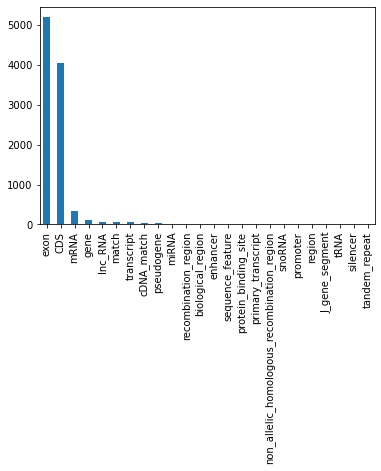

In [8]:
print(human_data.loc[:,"type"].unique())
human_data.loc[:,"type"].value_counts().plot.bar()

**3. Create a new column "len" that contains the length of each feature.**

In [11]:
# Remember that in sequences, start and end nucleotides are inclusive, but not in Python
human_data["len"] = human_data.end - human_data.start + 1
human_data

seqid           source  type      start        end score strand  \
0     NC_000023.11           Gnomon   CDS  124061771  124061874     .      +   
1     NC_000017.11       BestRefSeq  exon    5583687    5584512     .      -   
2     NC_000003.12       BestRefSeq  exon  131685875  131685958     .      -   
3     NC_000019.10           Gnomon   CDS   48221730   48221855     .      -   
4     NC_000023.11  Curated Genomic  exon  124280435  124281622     .      +   
...            ...              ...   ...        ...        ...   ...    ...   
9993  NC_000001.11           Gnomon   CDS   52481423   52481635     .      -   
9994  NC_000003.12           Gnomon  exon   52138169   52138302     .      -   
9995  NC_000005.10           Gnomon  exon  177135087  177136030     .      +   
9996  NC_000002.12           Gnomon   CDS  127050802  127050912     .      -   
9997  NC_000002.12           Gnomon  exon  209982179  209982317     .      +   

     phase                                         attributes   len  
0        2  ID=cds112493;Parent=rna159350;Dbxref=GeneID:10...   104  
1        .  ID=id1513246;Parent=rna126322;Dbxref=GeneID:22...   826  
2        .  ID=id454056;Parent=rna34945;Dbxref=GeneID:1310...    84  
3        0  ID=cds100981;Parent=rna143332;Dbxref=GeneID:22...   126  
4        .  ID=id1865702;Parent=gene53119;Dbxref=GeneID:10...  1188  
...    ...                                                ...   ...  
9993     0  ID=cds3944;Parent=rna5367;Dbxref=GeneID:23318,...   213  
9994     .  ID=id407700;Parent=rna31639;Dbxref=GeneID:2588...   134  
9995     .  ID=id636556;Parent=rna51086;Dbxref=GeneID:6432...   944  
9996     0  ID=cds15667;Parent=rna22237;Dbxref=GeneID:274,...   111  
9997     .  ID=id326999;Parent=rna25817;Dbxref=GeneID:2851...   139  

[9998 rows x 10 columns]

**6. Extract the gene name of all instances from the "attributes" column. Include it in a new column.** HINT: You can use `^` in the regular expression.

In [21]:
pattern = "(?<=gene=)[^;]+"
genes = [re.findall(pattern, l) for l in human_data.attributes]
human_data["gene"] = genes
human_data

seqid           source  type      start        end score strand  \
0     NC_000023.11           Gnomon   CDS  124061771  124061874     .      +   
1     NC_000017.11       BestRefSeq  exon    5583687    5584512     .      -   
2     NC_000003.12       BestRefSeq  exon  131685875  131685958     .      -   
3     NC_000019.10           Gnomon   CDS   48221730   48221855     .      -   
4     NC_000023.11  Curated Genomic  exon  124280435  124281622     .      +   
...            ...              ...   ...        ...        ...   ...    ...   
9993  NC_000001.11           Gnomon   CDS   52481423   52481635     .      -   
9994  NC_000003.12           Gnomon  exon   52138169   52138302     .      -   
9995  NC_000005.10           Gnomon  exon  177135087  177136030     .      +   
9996  NC_000002.12           Gnomon   CDS  127050802  127050912     .      -   
9997  NC_000002.12           Gnomon  exon  209982179  209982317     .      +   

     phase                                         attributes   len       gene  
0        2  ID=cds112493;Parent=rna159350;Dbxref=GeneID:10...   104    [STAG2]  
1        .  ID=id1513246;Parent=rna126322;Dbxref=GeneID:22...   826    [NLRP1]  
2        .  ID=id454056;Parent=rna34945;Dbxref=GeneID:1310...    84    [CPNE4]  
3        0  ID=cds100981;Parent=rna143332;Dbxref=GeneID:22...   126    [CARD8]  
4        .  ID=id1865702;Parent=gene53119;Dbxref=GeneID:10...  1188  [NPM1P34]  
...    ...                                                ...   ...        ...  
9993     0  ID=cds3944;Parent=rna5367;Dbxref=GeneID:23318,...   213  [ZCCHC11]  
9994     .  ID=id407700;Parent=rna31639;Dbxref=GeneID:2588...   134    [POC1A]  
9995     .  ID=id636556;Parent=rna51086;Dbxref=GeneID:6432...   944     [NSD1]  
9996     0  ID=cds15667;Parent=rna22237;Dbxref=GeneID:274,...   111     [BIN1]  
9997     .  ID=id326999;Parent=rna25817;Dbxref=GeneID:2851...   139    [UNC80]  

[9998 rows x 11 columns]

**5. Microexons are defined as exons shorter or equal than 27 nucleotides. Find all microexons in the dataset.**

In [22]:
is_exon = (human_data.type=="exon")
is_micro = (human_data.len<=27)
microexons = human_data.loc[is_exon&is_micro,:]
microexons

seqid      source  type      start        end score strand phase  \
130   NC_000012.12      Gnomon  exon   30753344   30753364     .      -     .   
481   NC_000008.11  BestRefSeq  exon   95072924   95072944     .      -     .   
568    NC_000021.9      Gnomon  exon   33802430   33802444     .      +     .   
610   NC_000003.12  BestRefSeq  exon  169107926  169107952     .      -     .   
654   NC_000016.10      Gnomon  exon   85124151   85124164     .      -     .   
...            ...         ...   ...        ...        ...   ...    ...   ...   
9339  NC_000009.12      Gnomon  exon   74747889   74747914     .      -     .   
9354  NC_000019.10      Gnomon  exon   36573043   36573065     .      -     .   
9482  NC_000009.12  BestRefSeq  exon   91119062   91119086     .      +     .   
9747  NC_000011.10      Gnomon  exon   65551548   65551564     .      -     .   
9983  NC_000011.10      Gnomon  exon   64653696   64653722     .      -     .   

                                             attributes  len            gene  
130   ID=id1189252;Parent=rna98739;Dbxref=GeneID:659...   21       [CAPRIN2]  
481   ID=id862365;Parent=rna71097;Dbxref=GeneID:1005...   21      [MIR3150B]  
568   ID=id1768972;Parent=rna150767;Dbxref=GeneID:64...   15         [ITSN1]  
610   ID=id469072;Parent=rna36375;Dbxref=GeneID:2122...   27         [MECOM]  
654   ID=id1497646;Parent=rna124874;Dbxref=GeneID:10...   14  [LOC105371381]  
...                                                 ...  ...             ...  
9339  ID=id918193;Parent=rna75799;Dbxref=GeneID:1408...   26         [TRPM6]  
9354  ID=id1684275;Parent=rna141267;Dbxref=GeneID:57...   23        [ZNF529]  
9482  ID=id927376;Parent=rna76516;Dbxref=GeneID:1001...   25     [LINC00484]  
9747  ID=id1116423;Parent=rna92469;Dbxref=GeneID:405...   17         [LTBP3]  
9983  ID=id1112151;Parent=rna92164;Dbxref=GeneID:937...   27         [NRXN2]  

[62 rows x 11 columns]

**6. Plot a histogram of the length of microexons. Use `plot.hist()`.**

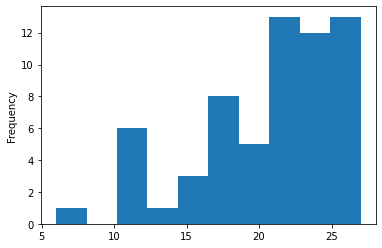

In [25]:
microexons["len"].plot.hist()

## EXERCISE 2 - GDP dataset

The analysis was prepared based on the World Bank Data, particularly the dataset [World Development Indicatiors](http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators) was utilized. This set contains many different economic development indicators you can choose from. For simplicity, we will use: GDP per capita (US\\$), GDP per capita growth (annual \%), GDP growth (annual \%), GDP (current US\\$).

**1. Load "GDP_last25years_08182020.csv" dataset. Missing data is written as "..", interpret it as NaN. Set the index of the DataFrame to "Series Name" and "Country Code" (multi-indexes are allowed in Pandas). Show the first five lines.**

In [59]:
gdp = pd.read_csv('data/GDP_last25years_08182020.csv', na_values="..", index_col= ["Series Name", "Country Name"])
gdp.head()

1995 [YR1995]  1996 [YR1996]  \
Series Name                      Country Name                                   
GDP per capita (current US$)     China            6.096567e+02   7.094138e+02   
GDP per capita growth (annual %) China            9.750279e+00   8.782185e+00   
GDP growth (annual %)            China            1.094923e+01   9.928372e+00   
GDP (current US$)                China            7.350000e+11   8.640000e+11   
GDP per capita (current US$)     European Union   1.946422e+04   1.974995e+04   

                                                 1997 [YR1997]  1998 [YR1998]  \
Series Name                      Country Name                                   
GDP per capita (current US$)     China            7.817442e+02   8.285805e+02   
GDP per capita growth (annual %) China            8.118548e+00   6.807806e+00   
GDP growth (annual %)            China            9.230769e+00   7.837614e+00   
GDP (current US$)                China            9.620000e+11   1.030000e+12   
GDP per capita (current US$)     European Union   1.808710e+04   1.861362e+04   

                                                 1999 [YR1999]  2000 [YR2000]  \
Series Name                      Country Name                                   
GDP per capita (current US$)     China            8.732871e+02   9.593725e+02   
GDP per capita growth (annual %) China            6.739270e+00   7.640002e+00   
GDP growth (annual %)            China            7.667486e+00   8.491508e+00   
GDP (current US$)                China            1.090000e+12   1.210000e+12   
GDP per capita (current US$)     European Union   1.847565e+04   1.690872e+04   

                                                 2001 [YR2001]  2002 [YR2002]  \
Series Name                      Country Name                                   
GDP per capita (current US$)     China            1.053108e+03   1.148508e+03   
GDP per capita growth (annual %) China            7.555802e+00   8.401915e+00   
GDP growth (annual %)            China            8.339911e+00   9.130646e+00   
GDP (current US$)                China            1.340000e+12   1.470000e+12   
GDP per capita (current US$)     European Union   1.718362e+04   1.868056e+04   

                                                 2003 [YR2003]  2004 [YR2004]  \
Series Name                      Country Name                                   
GDP per capita (current US$)     China            1.288643e+03   1.508668e+03   
GDP per capita growth (annual %) China            9.352364e+00   9.459175e+00   
GDP growth (annual %)            China            1.003560e+01   1.011122e+01   
GDP (current US$)                China            1.660000e+12   1.960000e+12   
GDP per capita (current US$)     European Union   2.292089e+04   2.626207e+04   

                                                 ...  2010 [YR2010]  \
Series Name                      Country Name    ...                  
GDP per capita (current US$)     China           ...   4.550454e+03   
GDP per capita growth (annual %) China           ...   1.010310e+01   
GDP growth (annual %)            China           ...   1.063614e+01   
GDP (current US$)                China           ...   6.090000e+12   
GDP per capita (current US$)     European Union  ...   3.293164e+04   

                                                 2011 [YR2011]  2012 [YR2012]  \
Series Name                      Country Name                                   
GDP per capita (current US$)     China            5.618132e+03   6.316919e+03   
GDP per capita growth (annual %) China            9.027256e+00   7.335380e+00   
GDP growth (annual %)            China            9.550914e+00   7.859627e+00   
GDP (current US$)                China            7.550000e+12   8.530000e+12   
GDP per capita (current US$)     European Union   3.571627e+04   3.315879e+04   

                                                 2013 [YR2013]  2014 [YR2014]  \
Series Name                      Country Name                 

**2. Note that column names are formated as "XXXX [YRXXXX]". Reformat it to XXXX.**

In [61]:
gdp.columns = [c[:4] for c in gdp.columns]
gdp.columns

Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

**3. Print the GDP (current US\\$) of Spain.**

In [55]:
gdp.loc["GDP (current US$)","Spain"]

1995    6.150000e+11
1996    6.430000e+11
1997    5.900000e+11
1998    6.190000e+11
1999    6.350000e+11
2000    5.970000e+11
2001    6.270000e+11
2002    7.050000e+11
2003    9.050000e+11
2004    1.070000e+12
2005    1.150000e+12
2006    1.260000e+12
2007    1.470000e+12
2008    1.630000e+12
2009    1.490000e+12
2010    1.420000e+12
2011    1.480000e+12
2012    1.320000e+12
2013    1.350000e+12
2014    1.370000e+12
2015    1.200000e+12
2016    1.230000e+12
2017    1.310000e+12
2018    1.420000e+12
2019    1.390000e+12
Name: (GDP (current US$), Spain), dtype: float64

**4. Which country has the higuest GDP per capita in 2019?**

In [71]:
gdp.loc["GDP per capita (current US$)","2019"].sort_values(ascending=False)

Country Name
Switzerland       81993.72715
United States     65118.35833
Germany           46258.87829
United Kingdom    42300.26713
France            40493.92857
European Union    34843.29747
Italy             33189.56580
Spain             29613.67114
Portugal          23145.04082
China             10261.67913
Name: 2019, dtype: float64

**5. Make 4 plots: GDP per capita (US\\$), GDP per capita growth (annual \%), GDP growth (annual \%) and GDP (current US\\$) over the years. You will need to transpose the data with `T`,**

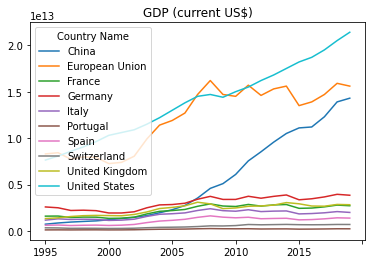

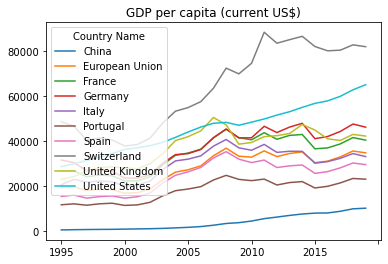

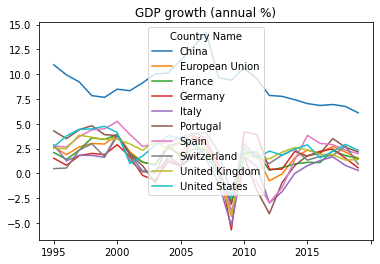

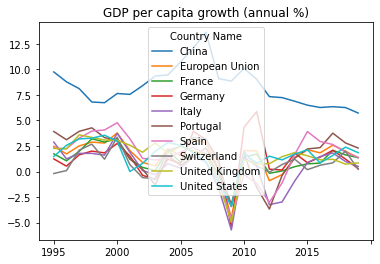

In [62]:
gdp.loc['GDP (current US$)'].T.plot(title="GDP (current US$)")
gdp.loc['GDP per capita (current US$)'].T.plot(title="GDP per capita (current US$)")
gdp.loc['GDP growth (annual %)'].T.plot(title="GDP growth (annual %)")
gdp.loc['GDP per capita growth (annual %)'].T.plot(title="GDP per capita growth (annual %)")

**6. To investigate whether different countries show the same trend over the years, make a correlation matrix of GDP per capita (current \\$US) using `corr()`.**

In [67]:
gdp.loc['GDP per capita (current US$)'].T.corr()

Country Name       China  European Union    France   Germany     Italy  \
Country Name                                                             
China           1.000000        0.782970  0.720490  0.842436  0.593854   
European Union  0.782970        1.000000  0.993893  0.978332  0.961874   
France          0.720490        0.993893  1.000000  0.969152  0.977244   
Germany         0.842436        0.978332  0.969152  1.000000  0.898287   
Italy           0.593854        0.961874  0.977244  0.898287  1.000000   
Portugal        0.727711        0.988499  0.982879  0.939951  0.975717   
Spain           0.647252        0.973518  0.977824  0.909412  0.990114   
Switzerland     0.902293        0.935713  0.914836  0.969990  0.826050   
United Kingdom  0.641183        0.902659  0.896296  0.833799  0.912397   
United States   0.947970        0.865432  0.807521  0.863324  0.734254   

Country Name    Portugal     Spain  Switzerland  United Kingdom  United States  
Country Name                                                                    
China           0.727711  0.647252     0.902293        0.641183       0.947970  
European Union  0.988499  0.973518     0.935713        0.902659       0.865432  
France          0.982879  0.977824     0.914836        0.896296       0.807521  
Germany         0.939951  0.909412     0.969990        0.833799       0.863324  
Italy           0.975717  0.990114     0.826050        0.912397       0.734254  
Portugal        1.000000  0.991938     0.882162        0.912868       0.848125  
Spain           0.991938  1.000000     0.840164        0.924557       0.792635  
Switzerland     0.882162  0.840164     1.000000        0.785463       0.891383  
United Kingdom  0.912868  0.924557     0.785463        1.000000       0.811382  
United States   0.848125  0.792635     0.891383        0.811382       1.000000